# Actividad: Estimación de Parámetros

> Alfonso Pineda Cedillo | A01660394

**Fecha de entrega:** 21 de Agosto de 2023

---

## Problema 1
Un fabricante de baterías electrónicas está interesado en la duración de las baterías antes de que necesiten ser reemplazadas. Para evaluar esto, el fabricante ha realizado un estudio en el que probó baterías en condiciones normales y registró el tiempo (en horas) hasta que cada batería se agotó. Descarga la base de datos que obtuvo, la podrás encontrar en canvas con el nombre de "baterías".

Dada la muestra de datos proporcionada ¿Cuál es el valor esperado poblacional (esperanza matemática) de la vida útil de las baterías?

Hint: Compara los histogramas de una normal y una exponencial. Identifica cuál de estos describe mejor los datos.

### Solución
Primero, importamos las librerías necesarias y el archivo XLSX correspondiente.

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_excel('baterias(1).xlsx')

In [8]:
df.head()

,numero_de_bateria,tiempo_hasta_agotar
0,1,0.156423
1,2,1.003374
2,3,0.438915
3,4,0.304314
4,5,0.056542


Comprobamos que el DataFrame no contenga valores nulos.

In [37]:
df.isnull().sum()

numero_de_bateria      0
tiempo_hasta_agotar    0
dtype: int64

### Graficación

Creamos un histograma de los datos de los tiempos de vida de las baterías y ajustamos una distribución exponencial y una distribución normal de los datos.

De este modo, podemos visualizar un comportamiento normal y uno exponencial comparado con nuestros datos reales,  pudiendo identificar qué comportamiento está teniendo nuestros datos.

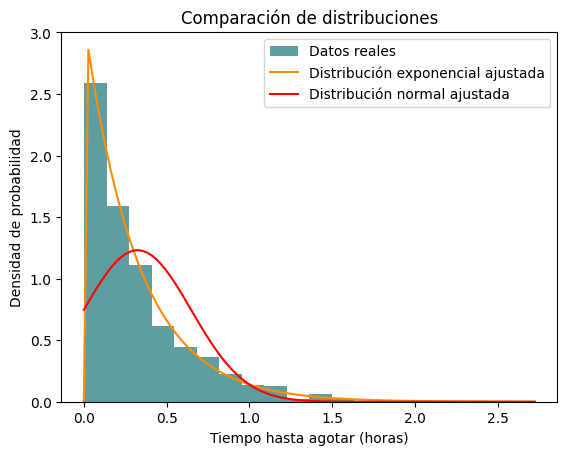

In [33]:
# Realizamos el histograma de los datos bridados
data = df['tiempo_hasta_agotar']
plt.hist(data, bins=20, density=True, color='cadetblue', label='Datos reales')

# Ajustamos una distribución exponencial
param_estimados = stats.expon.fit(data)
x = np.linspace(0, max(data), 100)
pdf_estimada = stats.expon.pdf(x, *param_estimados)
plt.plot(x, pdf_estimada, color='darkorange', label='Distribución exponencial ajustada')

# Ajustamos una distribución normal
param_estimados_norm = stats.norm.fit(data)
pdf_estimada_norm = stats.norm.pdf(x, *param_estimados_norm)
plt.plot(x, pdf_estimada_norm, color='red', label='Distribución normal ajustada')

plt.xlabel('Tiempo hasta agotar (horas)')
plt.ylabel('Densidad de probabilidad')
plt.title('Comparación de distribuciones')
plt.legend()

plt.show()

Dado la gráfica anterior, podemos observar que los datos manejados cuentan con un comportamiento exponencial.

### Cálculo de valor esperado poblacional

Calculamos el valor esperado poblacional (esperanza matemática) de la vida útil de las baterías

El valor esperado poblacional de una exponencial está dada por:

$\mathbb{E}[X] = \frac{1}{\lambda}$ ; donde $\lambda = \frac{1}{\overline{X}}$

Debido a lo anterior, el valor esperado poblacional ($\mathbb{E}[X]$) de la distribución exponencial coincide con el promedio ($\overline{X}$) de los datos.

A continuación, se muestra el cálculo de el valor esperado poblacional, haciendo uso del método `mean()` de `numpy`.

In [16]:
valor_esperado_poblacional = np.mean(data)

print("Valor esperado poblacional:", valor_esperado_poblacional)

Valor esperado poblacional: 0.32416864932174144


## Problema 2

Un equipo de soporte técnico está investigando cuántos intentos se requieren en promedio para resolver un problema de software común. Registraron el número de intentos realizados antes de que se resolviera el problema. Podrás encontrar los resultados obtenidos en la base de datos llamada software disponible en canvas. Dada la muestra de datos proporcionada, intuye de forma poblacional ¿cuál es la probabilidad de resolver el problema?

Primero, importamos el archivo XLSX correspondiente.

In [19]:
df2 = pd.read_excel('software.xlsx')
df2.head()

,problema,intentos_hasta_resolver
0,1,2
1,2,9
2,3,4
3,4,3
4,5,1


Comprobamos que el DataFrame no contenga valores nulos.

In [36]:
df2.isnull().sum()

problema                   0
intentos_hasta_resolver    0
dtype: int64

### Solución

Debido a la naturaleza del problema, tenemos un caso en el que recibimos el número de ensayos de Bernoulli (fracasos o intentos de resolver el problema) hasta obtener un éxito. De esta manera, sabemos que el problema trata de una distribución geométrica.

Sabiendo que estamos manejando una distribución geométrica, los parámetros están dados por:

$\hat{p} = \frac{n}{\sum^n_{i = 1}x_i}$ , donde $n$ es la cantidad total de datos (tamaño de la muestra) y $x_i$ es el valor de cada dato.

Dicho lo anterior, hacemos los cálculos correspondientes.

In [35]:
# Aislamos la columna de 'intentos_hasta_resolver'
intentos = df2['intentos_hasta_resolver']

# Aplicamos la fórmula anterior para obtener la probabilidad
prob = len(intentos)/intentos.sum()

# Mostramos el resultado
print("La probabilidad de resolver el problema es: ", prob)

La probabilidad de resolver el problema es:  0.29779630732578916


---

Alfonso Pineda Cedillo | A01660394